# Recomendação de filmes 

Esse projeto é de cunho acadêmico do **curso de Machine Learning da Alura** e tem o objetivo de trabalhar com técnicas de **Ciência de Dados**.  Nesse projeto vamos trabalhar com um  **Algortimo não supervisionado** e veremos:

* Dummies
* Escalonamento
* Clusterização com KMeans
* TSNE
* Dendrograma

In [0]:
# importa a bibloteca
import pandas as pd

In [0]:
# lê os dados em CSV através de uma uri

uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
original_date = pd.read_csv(uri)
original_date.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


O arquivo original contém 3 colunas, na coluna *genres* todos os gêneros possíveis estão separados por um pipe |  e isso dificultará trabalharmos com a recomendação. Por que se quiséssemos filtras apenas os filmes de gênero Fantasy, teríamos que separar todos os gêneros e depois filtrar. 

Por isso vamos subtrair os **dummies (gêneros)**
de cada linha. Vamos criar um novo dataset em que cada coluna será um gênero e cada filme terá a marcação 0 ou 1 para indicar se está contido naquele gênero, sendo que 1 significa que sim e 0 é igual a não.

In [0]:
# separa os generos
generos = original_date.genres.str.get_dummies()

# concatena os dados dos filmes com cada gênero
dados = pd.concat([original_date, generos], axis=1)

# visualiza as 5 primeiras linhas do dataset
dados.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Agora que os gêneros foram separados, será preciso escalar. 
Saber que um filme é comédia e romance não me dá o poder de classificá-lo. Geralmente há um gênero que se sobressai. Para isso vamos criar uma escala que indicará qual o gênero é mais forte.
E para **escalonar** esses dados vamos usar a função **StandardScaler** da biblioteca **sklearn**

In [0]:
# importa a biblioteca
from sklearn.preprocessing import StandardScaler

# cria o escalador
escala = StandardScaler()

# treina o modelo 
generos_escalados = escala.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

Agora que temos os dados em escala, podemos saber quais gêneros se sobressaem para cada filme. Então vamos **agrupar** os gêneros e para isso vamos usar a **KMeans** que é uma função de **clusterização** ou de **agrupamento**

In [0]:
# importa a função da biblioteca
from sklearn.cluster import KMeans

# cria a função (o modelo)
# é importante dizer a quantidade de grupos que queremos, esse é o valor de n_clusters
modelo = KMeans(n_clusters=3)

# treina o modelo
modelo.fit(generos_escalados)

# visualiza os grupos
print('Grupos {}'.format(modelo.labels_))

Grupos [1 1 0 ... 0 1 0]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f728f9967b8>,
      dtype=object)

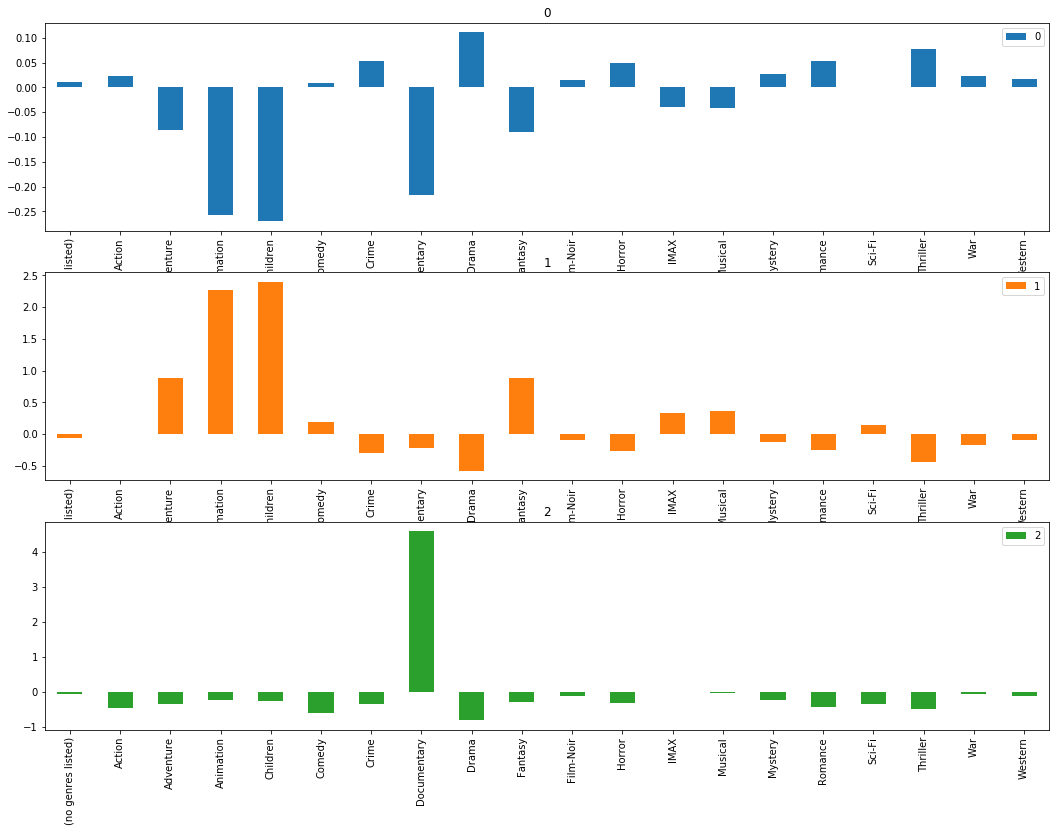

In [0]:
# para ver os grupos criados vamos atribuir os dados para um dataframe
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)


grupos.transpose().plot.bar(subplots=True, figsize=(18, 13), sharex=False)

In [0]:
# para conferir se o agrupamento está bom, vamos olhar 5 dados do grupo 2
filtro = modelo.labels_ == 2
dados[filtro].sample(5)

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7123,71131,"Most Hated Family in America, The (2007)",Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4964,7566,28 Up (1985),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6392,50658,49 Up (2005),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7497,82857,Sweetgrass (2009),Adventure|Documentary|Western,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9241,154358,The Barkley Marathons: The Race That Eats Its ...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


A parentemente os grupos estão bons, com esses dados já podemos pensar em recomendar, mas antes vamos plotar os dados de outra forma para entender como se comportam.

Vamos plotar um gráfico de pontos, porém como temos 20 categorias vamos usar um algorítmo para reduzir as dimensões.

Vamos usar o **T-SNE** que é uma função para reduzir dimensões.

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

In [0]:
visualizacao

array([[  5.375048,  64.48505 ],
       [ 47.091797, -25.239866],
       [ 35.149727,  18.843512],
       ...,
       [-11.759597, -15.663503],
       [-18.626026,   9.178406],
       [  7.992071,  15.780543]], dtype=float32)

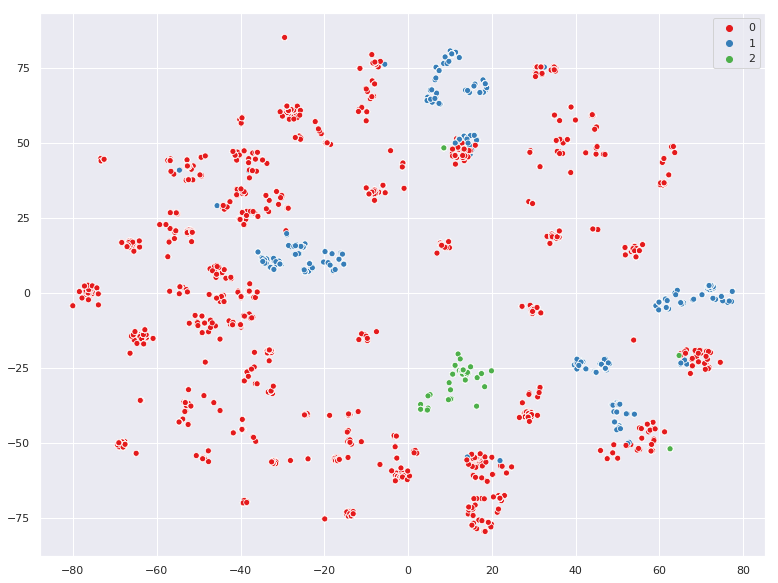

In [0]:
import seaborn as sns

# define o tamanho da figura
sns.set(rc={'figure.figsize': (13, 10)})

# define as dimensões do gráfico, sendo que o parâmetro Hue são as cores e o Palette é a paleta de cores
sns.scatterplot(x=visualizacao[:, 0], y=visualizacao[:, 1], hue=modelo.labels_, palette=sns.color_palette('Set1', 3))

É importante lembrar que quando usamos algum método para reduzir a dimensão, podemos perder algumas informações, como no gráfico acima é possível ver uma sobreposição de alguns grupos, o vermelhor misturado com o azul, por exemplo. Mas isso não significa que estamos com os grupos misturados mas pode ser uma ilusão de ótica, em que um está em um nível acima mas como reduzimos as dimensões parece se sobrepor.

Para 3 grupos ou 3ks o modelo agrupou bem, mas podemos testar com outra quantidade de grupos, para isso criamos uma função e toda vez que quisermos testar o número de K podemos chamar a função.

Mas para saber o quanto cada K testado está bom ou não, vamos retornar a **inertia** que é o erro.

Lembrando que quanto mais grupos, menor a distância entre os pontos e o centróide, mas será maior a chance dados que deveriam estar no mesmo grupo estarem em grupos difernetes. Portanto é importante achar o número de K ideal.

Para achar o número de grupos ideal, vamos usar o **elbow method**

In [0]:
# cria funsção
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

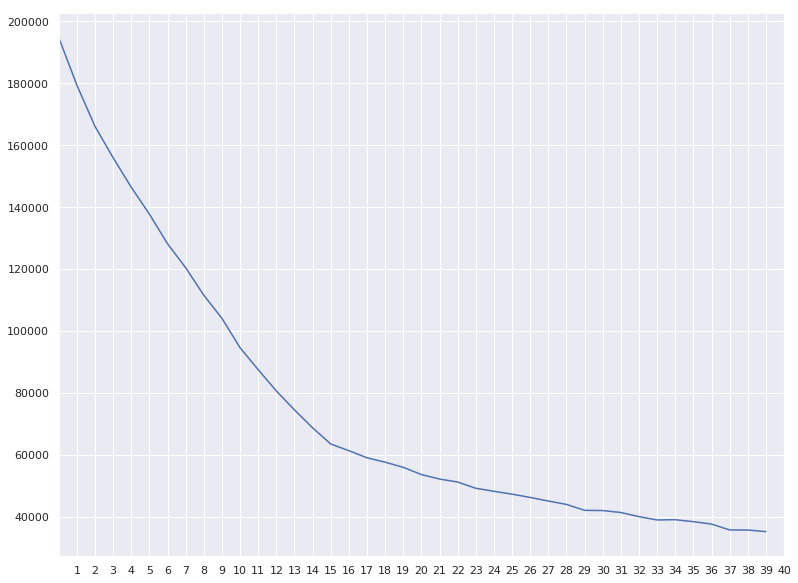

In [0]:
# cria uma lista com os possíveis números de grupos de 1 a 40 
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]

# transforma em dataframe
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])

# plota os resultados
resultado.inertia.plot(xticks=resultado.grupos)

O **elbow method** ou 'modelo do cotovelo' é bastante usado para otimizar a clusterização, ele diz que na curva entre o número de grupo e o erro vai ter um ponto de quebra (ou "elbow point")que seria o 'cotovelo'. E é esse número de cluster que irá otimizar nosso modelo.

Nesse caso o "elbow point" é no ponto 15. Então podemos usar o modelo com 15 clusters.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f728af5f0b8>,
      dtype=object)

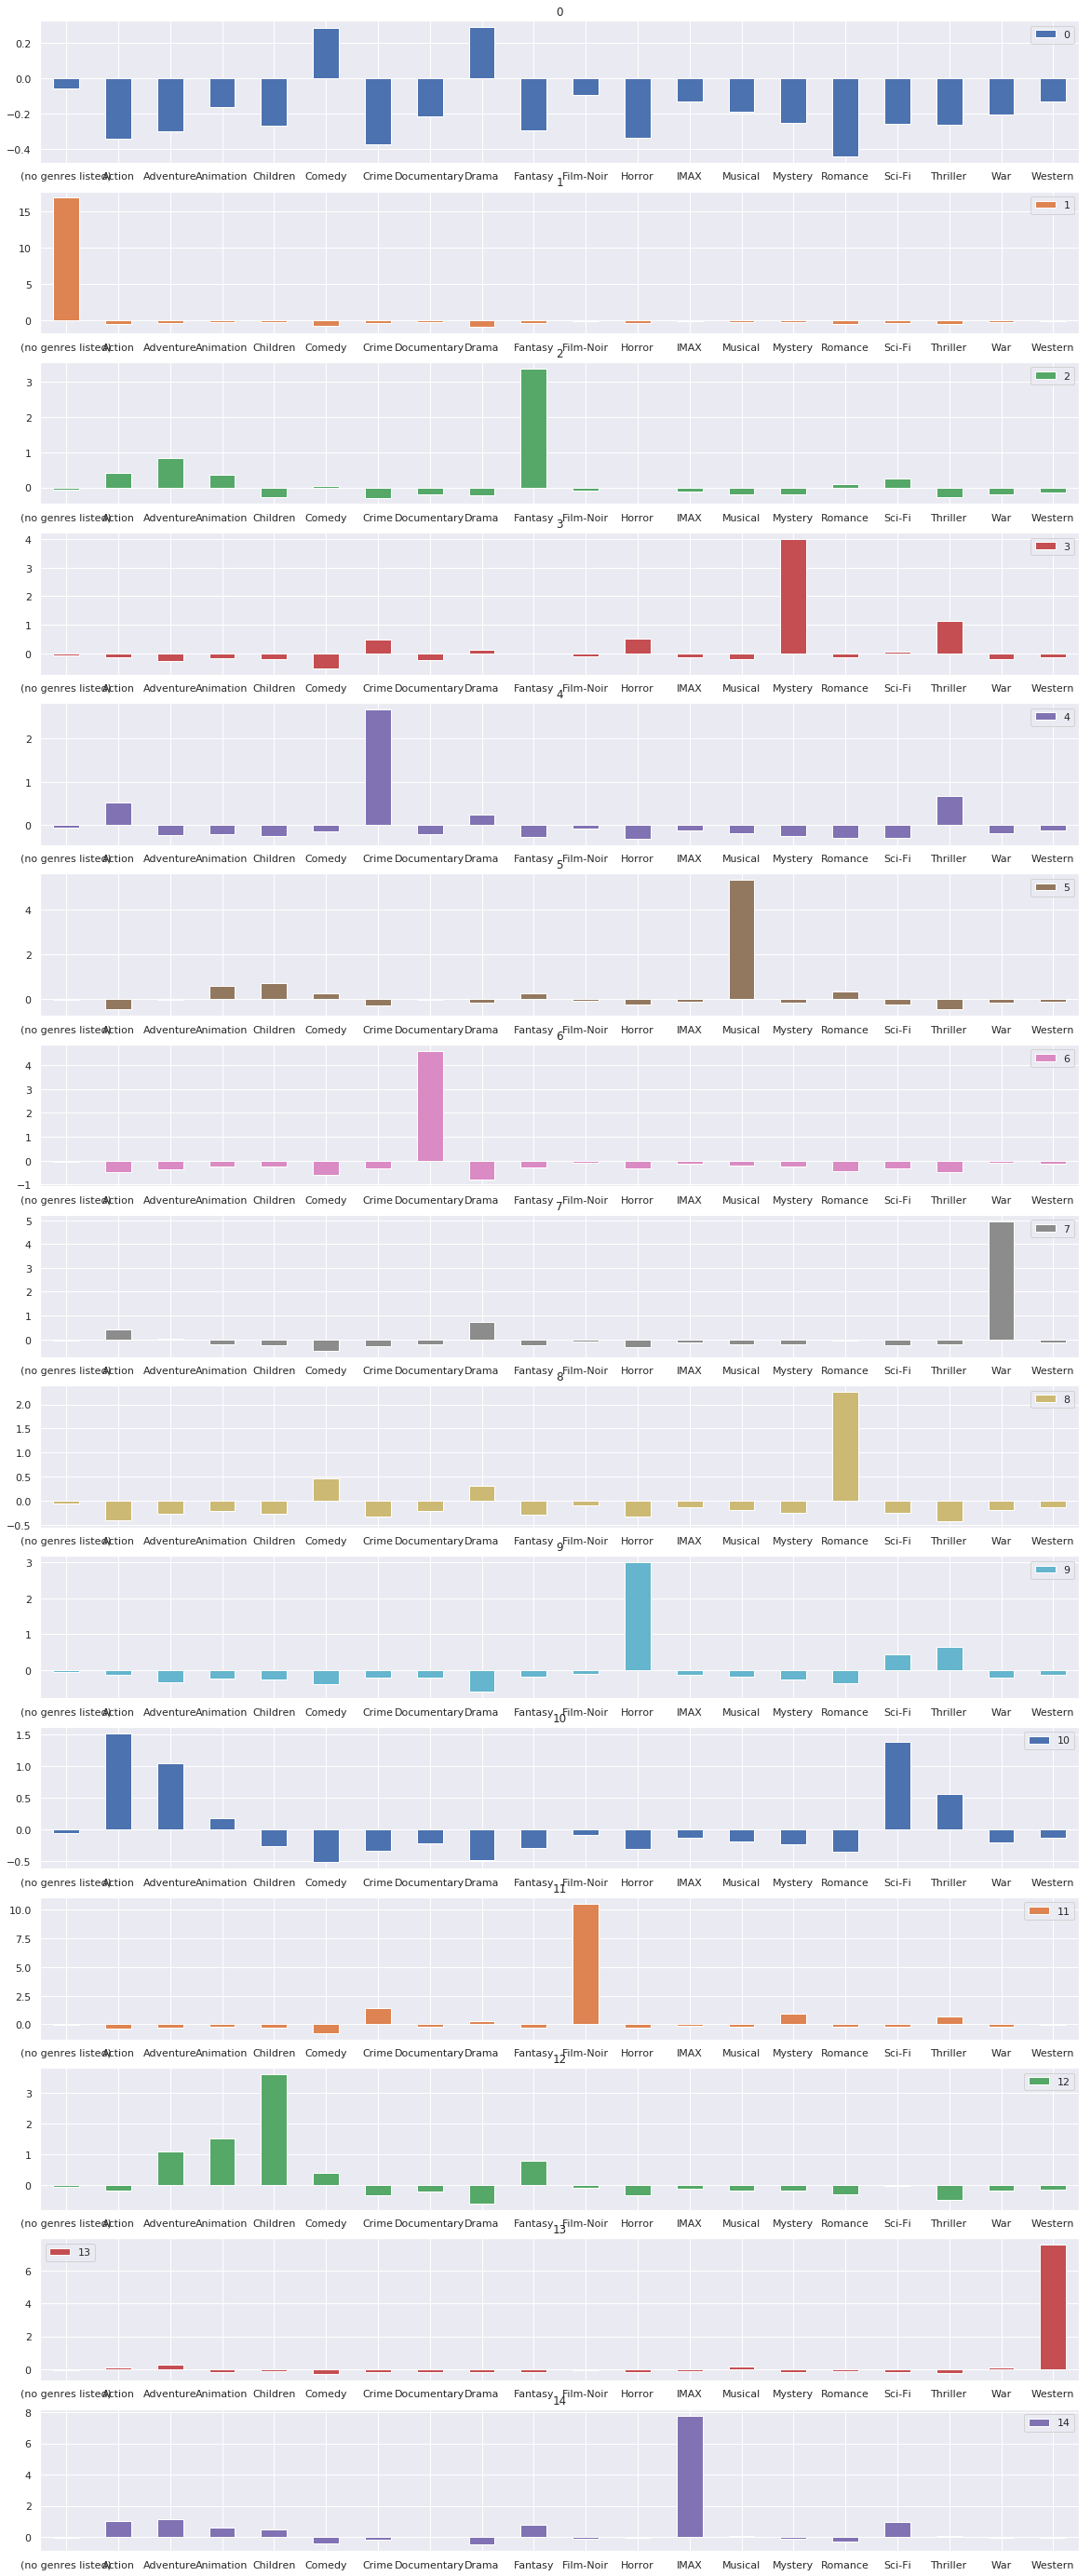

In [0]:
modelo = KMeans(n_clusters=15)
modelo.fit(generos_escalados)

# visualiza os grupos
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(20, 50), sharex=False, rot=0)

Agora para sabermos quais os grupos são próximos, vamos usar um metodo do KMeans que se chama **agrupamento particionado**. Assim será possível recomendar gêneros diferentes mas que são psóximos entre si, como ficção e drama, por exemplo.

In [0]:
from sklearn.cluster import AgglomerativeClustering
modelo = AgglomerativeClustering(n_clusters=15)
grupos = modelo.fit_predict(generos_escalados)

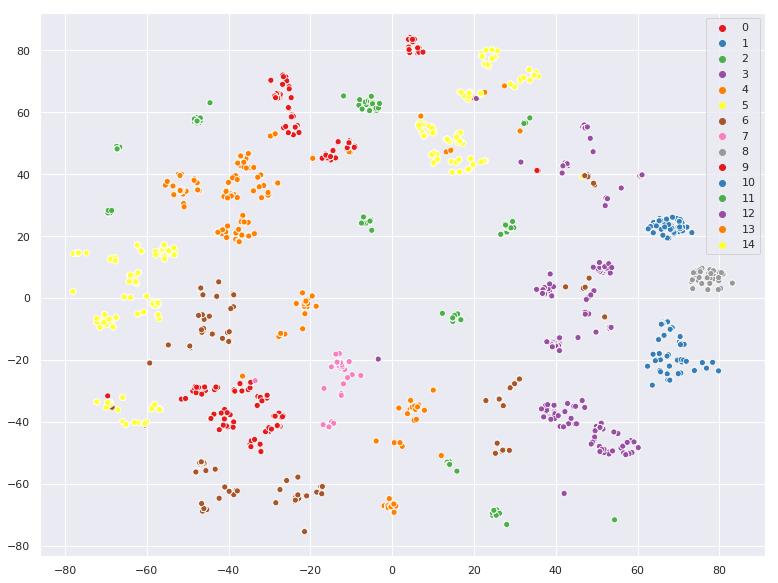

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

sns.scatterplot(x=visualizacao[:, 0], y=visualizacao[:, 1], hue=grupos, palette=sns.color_palette('Set1', 15))

Agora vamos criar um **dendrograma** que é um gráfico em formato de árvore que nos possibilita ver a hierarquia de cada grupo, já que no gráfico acima temos só 2 dimensões e não conseguimos ver hierarquias.

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f728a2d6a20>,
      dtype=object)

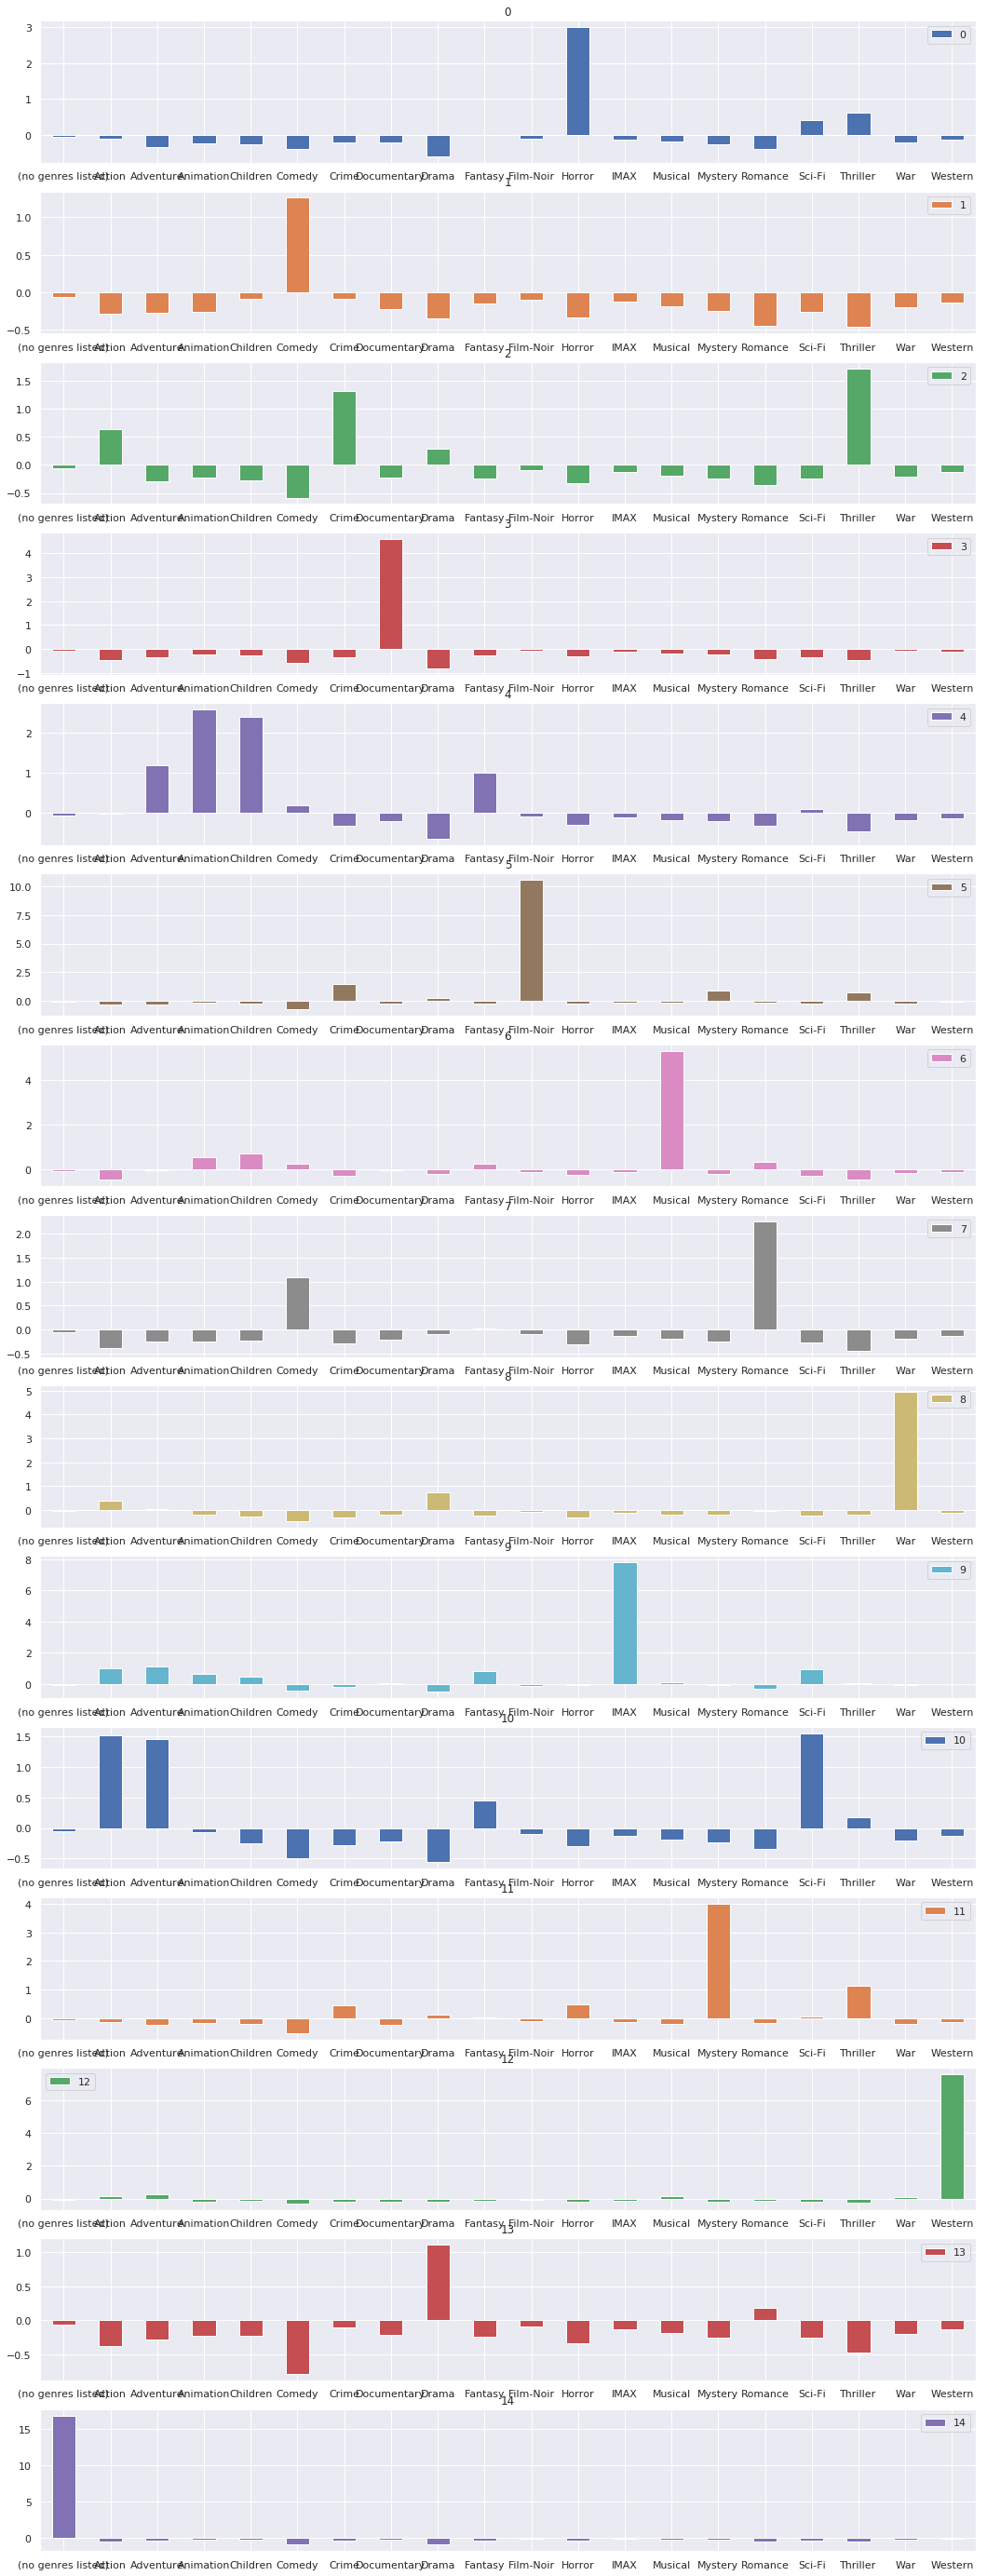

In [0]:
modelo = KMeans(n_clusters=15)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,figsize=(18, 50), sharex=False, rot=0)

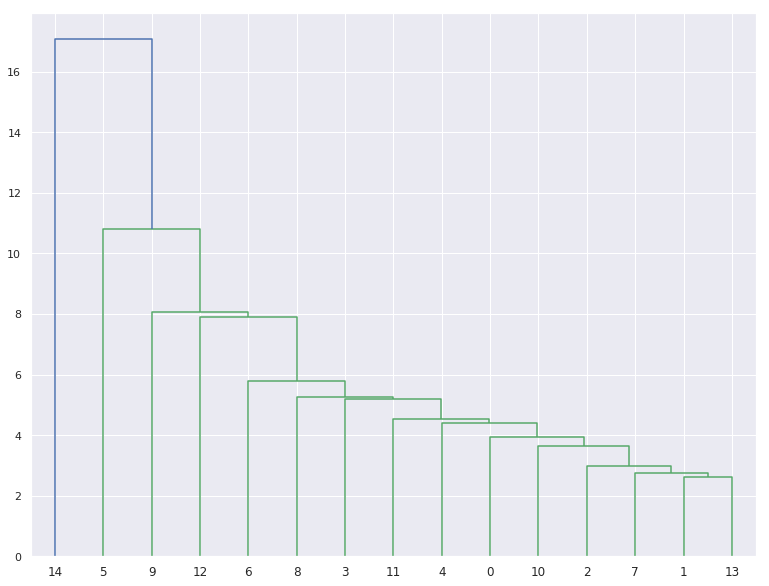

In [0]:
matriz_de_distancia = linkage(grupos)

dendrograma = dendrogram(matriz_de_distancia)

##Recomendador:

Com o **Dendrograma** podemos perceber quais gêneros estão mais próximos.
O grupo 7 - Romance está próximo do grupo 1 - Comédia, então se uma pessoa assite muitos filmes de romance, podemos recomendar um filme de comédia que há grandes chances de ela gostar.